# **Flight Ticket Price Predicition Using Exploratory Data Analysis (EDA)**

In [1]:
# Importing all the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/flight-price-prediction/business.csv
/kaggle/input/flight-price-prediction/economy.csv
/kaggle/input/flight-price-prediction/Clean_Dataset.csv


In [2]:
#importing basic required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('/kaggle/input/flight-price-prediction/Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# **Quick Info about the Data**


In [4]:
# A Quick Information about the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
# Size of the data 
df.shape

(300153, 12)

In [6]:
# Gives about the airline details
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: airline, dtype: int64

In [7]:
#Classification of classes in airlines
df2=df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()


Economy     1560
Business     295
Name: class, dtype: int64

# **Number of passengers per Airlines**

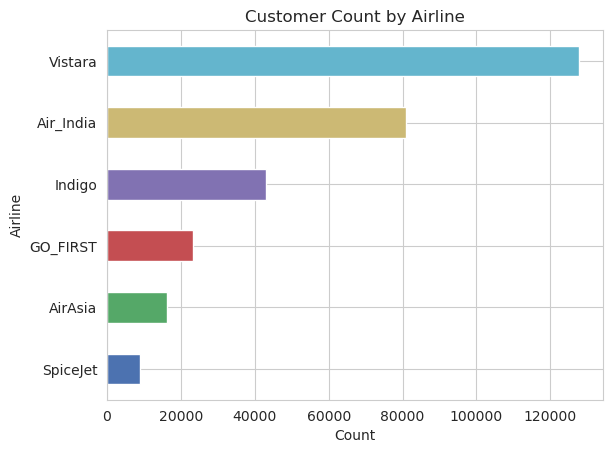

In [8]:
airline_counts = df['airline'].value_counts().sort_values(ascending=True)
sns.set_style("whitegrid")
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD']

# Create horizontal bar chart of airline counts
airline_counts.plot(kind='barh', color=colors)
plt.title("Customer Count by Airline")
plt.xlabel("Count")
plt.ylabel("Airline")
plt.show()

# **Average ticket price of each Airlines**

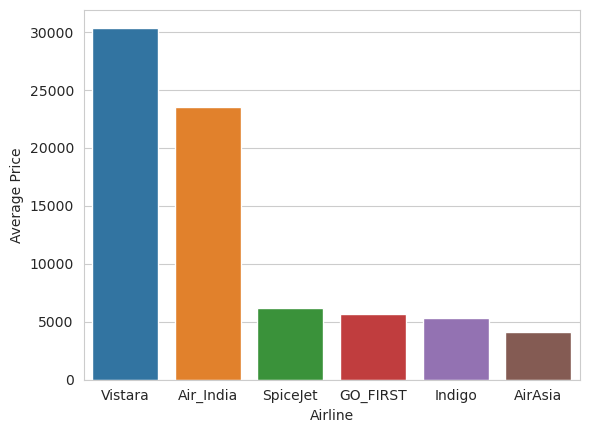

In [9]:
avg_price = df.groupby('airline')['price'].mean().reset_index()
avg_price = avg_price.sort_values(by='price',ascending=False)
sns.barplot(x='airline', y='price', data=avg_price)

plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.show()

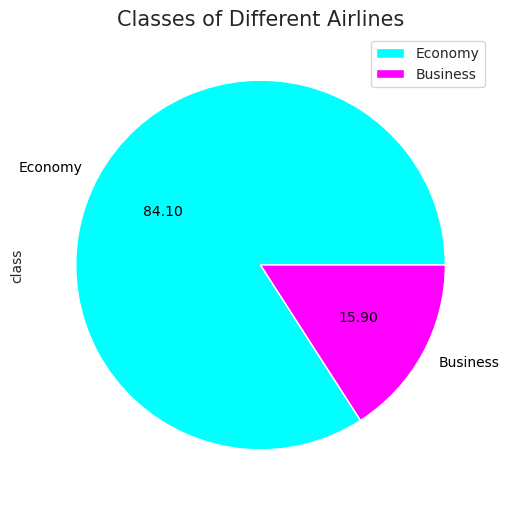

In [10]:
# Pie chart representation of different classes of Airlines
plt.figure(figsize=(8,6))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

# **Ticket prices Based On Airline Class**

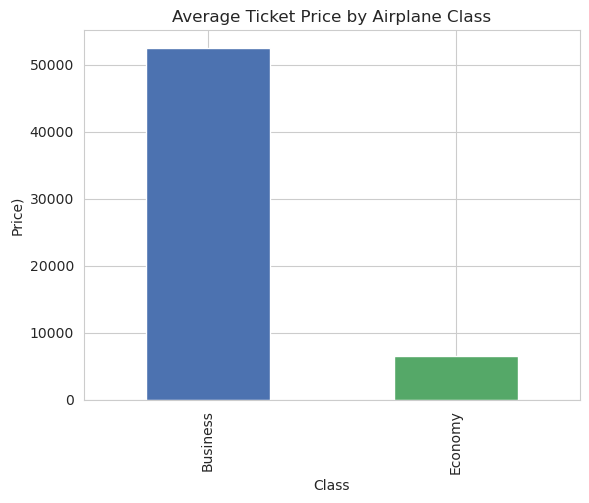

In [11]:
class_prices = df.groupby('class')['price'].mean()
sns.set_style("whitegrid")
class_prices.plot(kind='bar', color=['#4C72B0', '#55A868'])
plt.title("Average Ticket Price by Airplane Class")
plt.xlabel("Class")
plt.ylabel("Price)")
plt.show()

# **Ticket price based on Flight Duration**

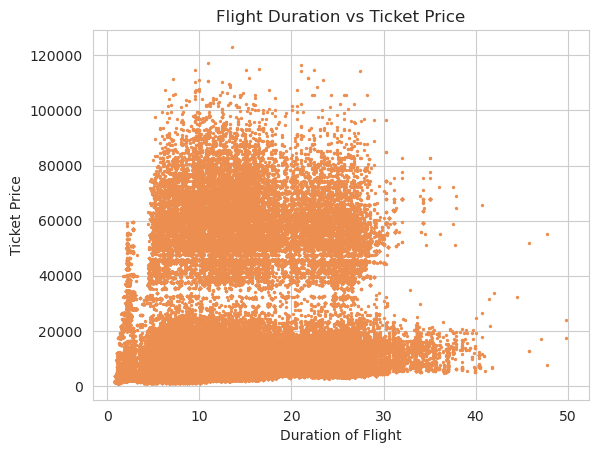

In [12]:
plt.scatter(df['duration'], df['price'], s=2, color= '#ed8e51')

plt.title("Flight Duration vs Ticket Price")
plt.xlabel("Duration of Flight")
plt.ylabel("Ticket Price")
plt.show()

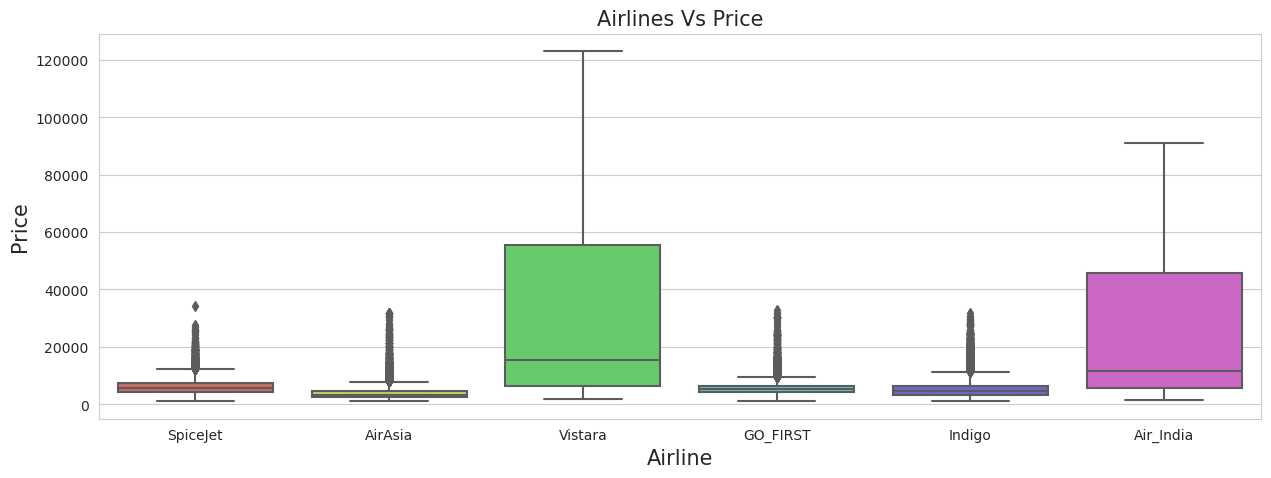

In [13]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

# **How the Ticket Price changes based on the Departure Time and Arrival Time?**
 **1. Departure Time Vs Ticket Price**

* Ticket Price is More for the Flights when the Departure Time is at Night
* Ticket Price is almost equal for flights Having Departure time at Early_morning , Morning and Evening
* Ticket Price is Low for the Flights Having Departure Time at Late_night

**2. Arrival Time Vs Ticket Price**

* Ticket Price is More for the Flights when the Arrival Time is at Evening
* Ticket Price is almost equal for flights Having Arrival time is at Morning and Night
* Ticket Price is Low for the Flights Having Arrival Time at Late_night as same as Departure Time

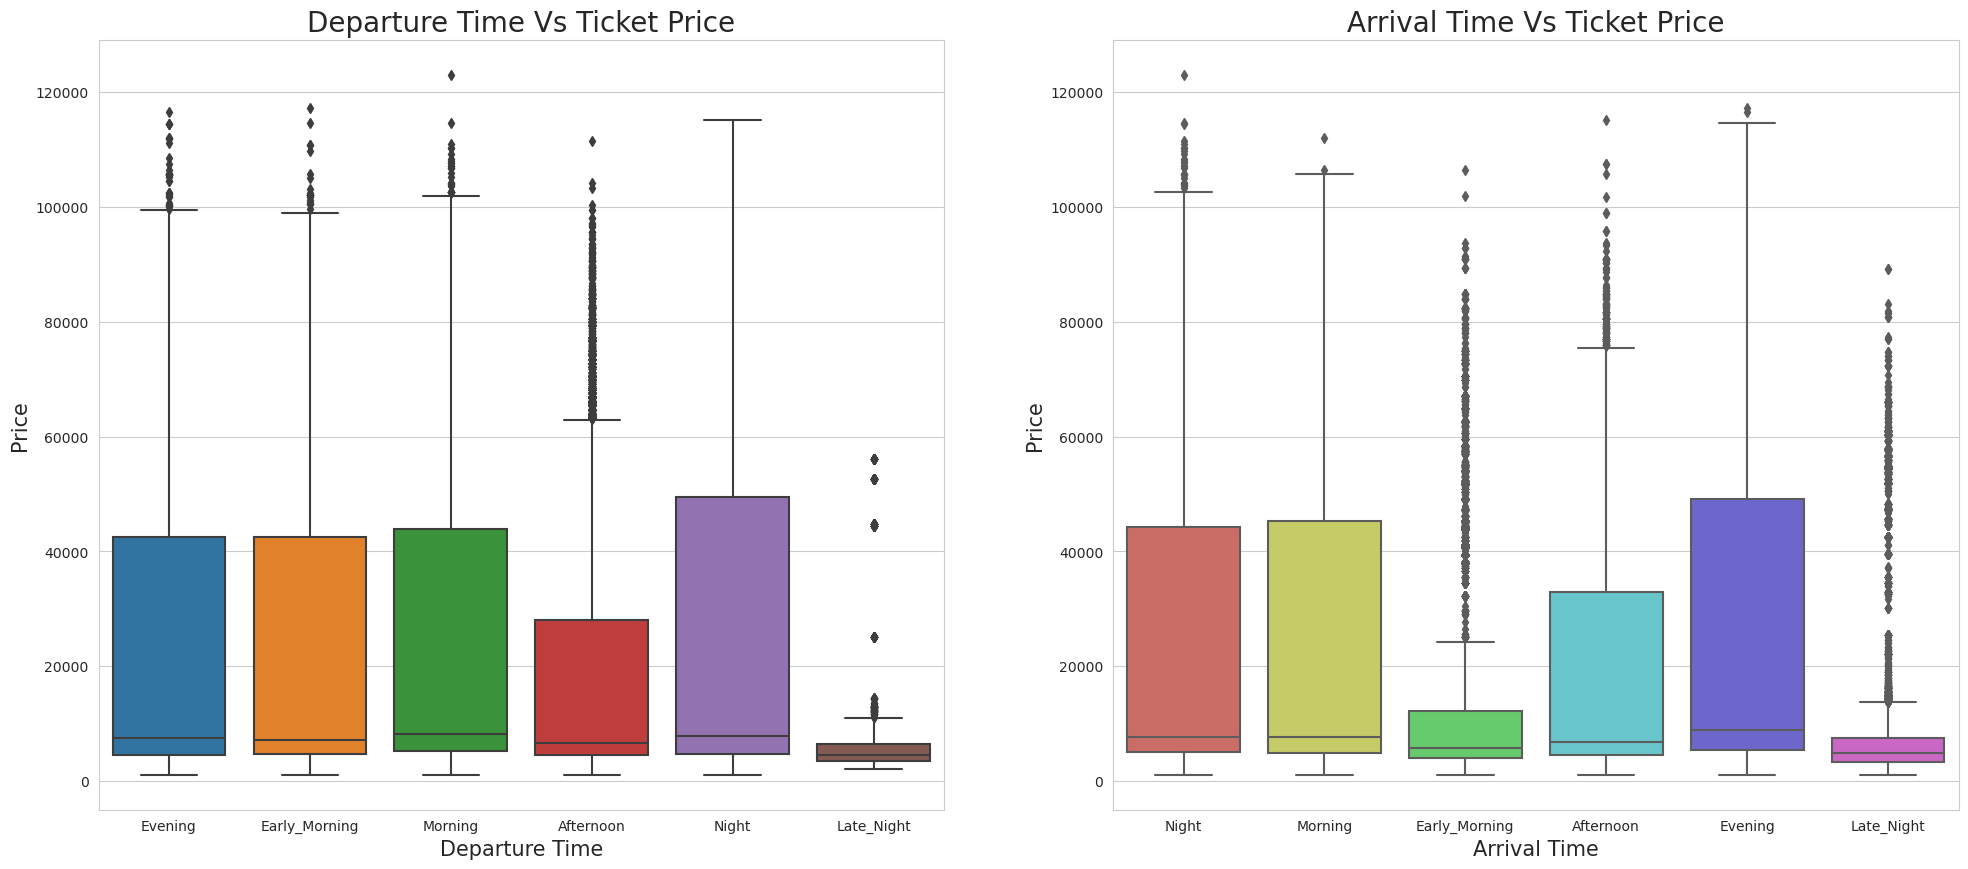

In [14]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

# **How the Ticket price changes with change in Source city and Destination city?**
**1. Source City Vs Ticket Price**

* Ticket Price is More for the Flights whose Source City is Kolkata
* Ticket Price is almost equal for flights Having Source Cities as Mumbai and chennai , Hyderabad and Bangalore
* Ticket Price is Low for the Flights Having Source City as Delhi

**2. Destination City Vs Ticket Price**

* Ticket Price is More for the Flights whose Destination City is kolkata and Chennai
* Ticket Price is almost equal for flights Having Destination Cities as Mumbai and Bangalore
* Ticket Price is Low for the Flights Having Destination City as Delhi

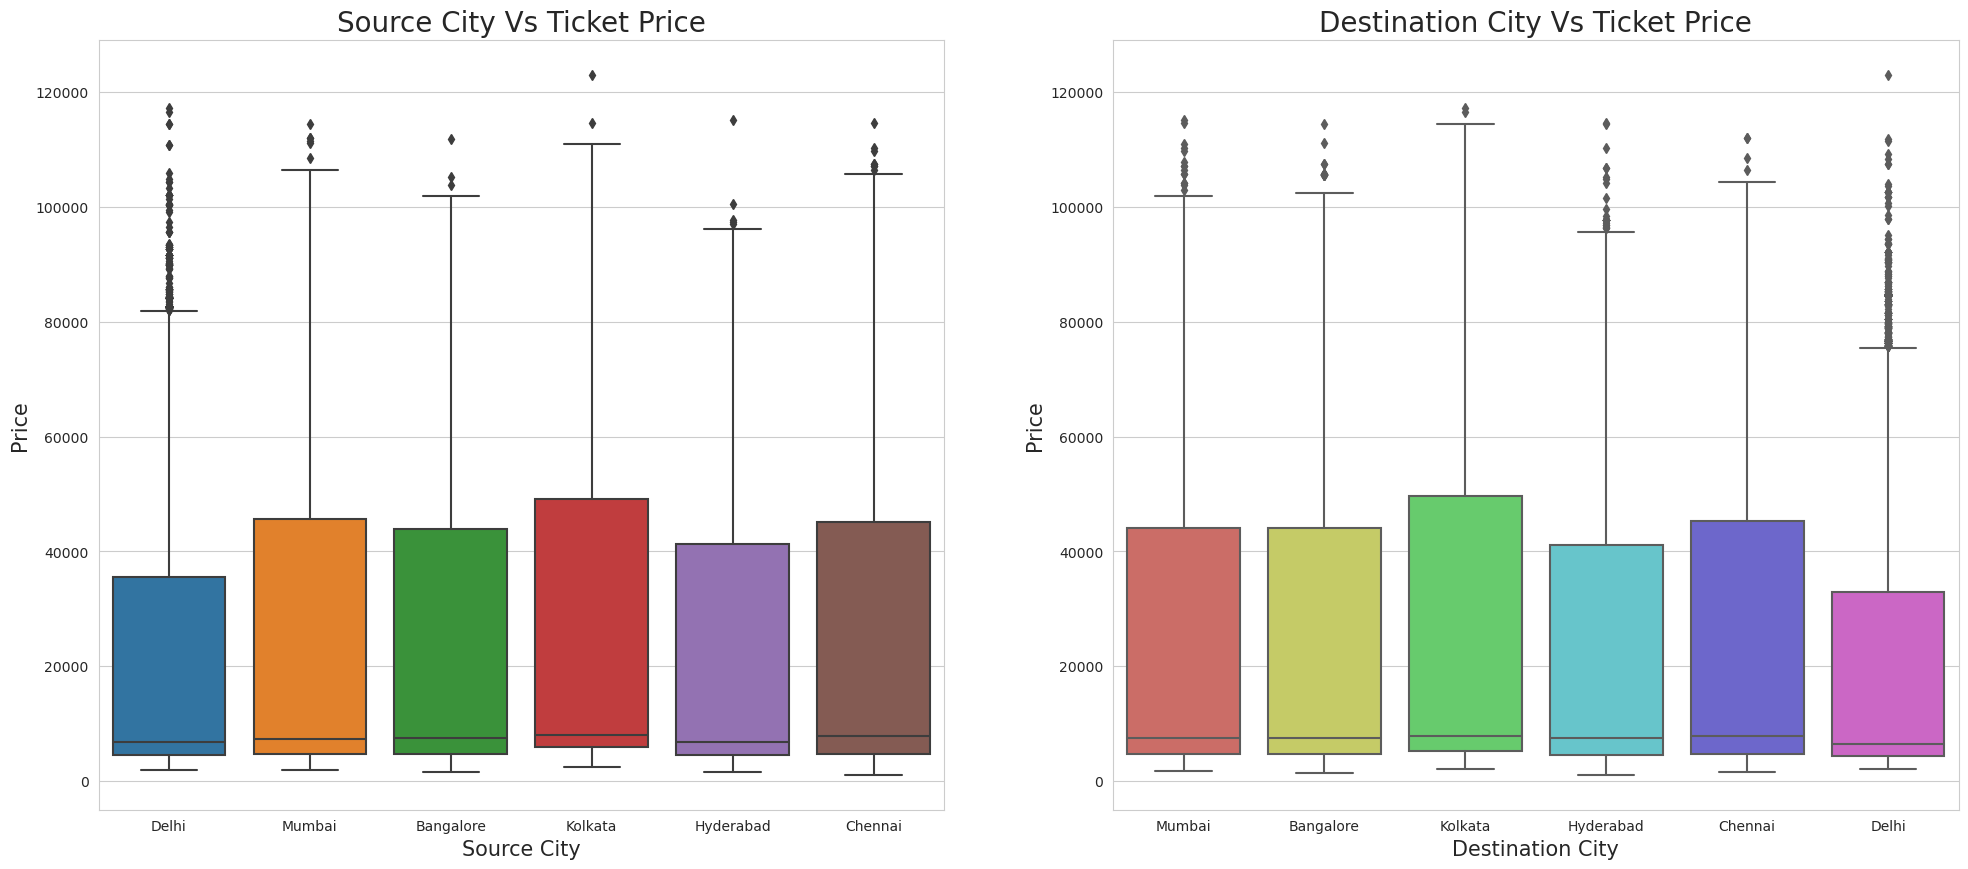

In [15]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=df)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=df,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

# **Total number of Flights from One City to Another City**



In [16]:
df.groupby(['flight','source_city','destination_city','airline','class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count().head(20)

,source_city,destination_city,flight
0,Bangalore,Chennai,106
1,Bangalore,Delhi,227
2,Bangalore,Hyderabad,132
3,Bangalore,Kolkata,171
4,Bangalore,Mumbai,175
5,Chennai,Bangalore,69
6,Chennai,Delhi,105
7,Chennai,Hyderabad,82
8,Chennai,Kolkata,110
9,Chennai,Mumbai,94


# **Average Price of different Airlines from Source city to Destination city**

In [17]:
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().head(10)

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
5,AirAsia,Chennai,Bangalore,1914.760870
6,AirAsia,Chennai,Delhi,3697.314003
7,AirAsia,Chennai,Hyderabad,2053.182540
8,AirAsia,Chennai,Kolkata,3682.338762
9,AirAsia,Chennai,Mumbai,2691.100000


#  **Relation between Number of stops for a flight and the price of flight ticket**

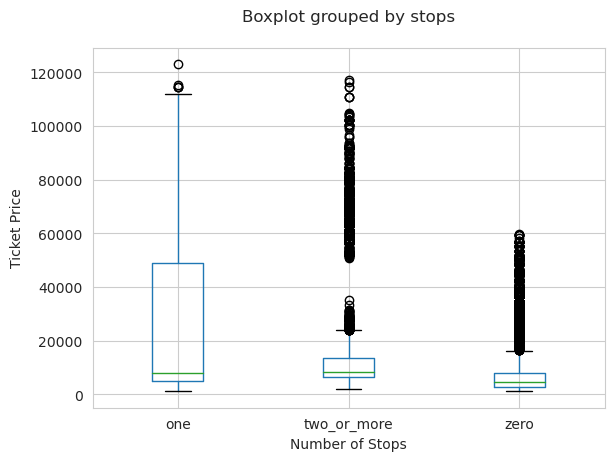

In [18]:
# Create box plot of number of stops vs ticket price
df.boxplot(column='price', by='stops')

plt.title("")
plt.xlabel("Number of Stops")
plt.ylabel("Ticket Price")
plt.show()

# **Estimated Price of Ticket before the Departure Time**

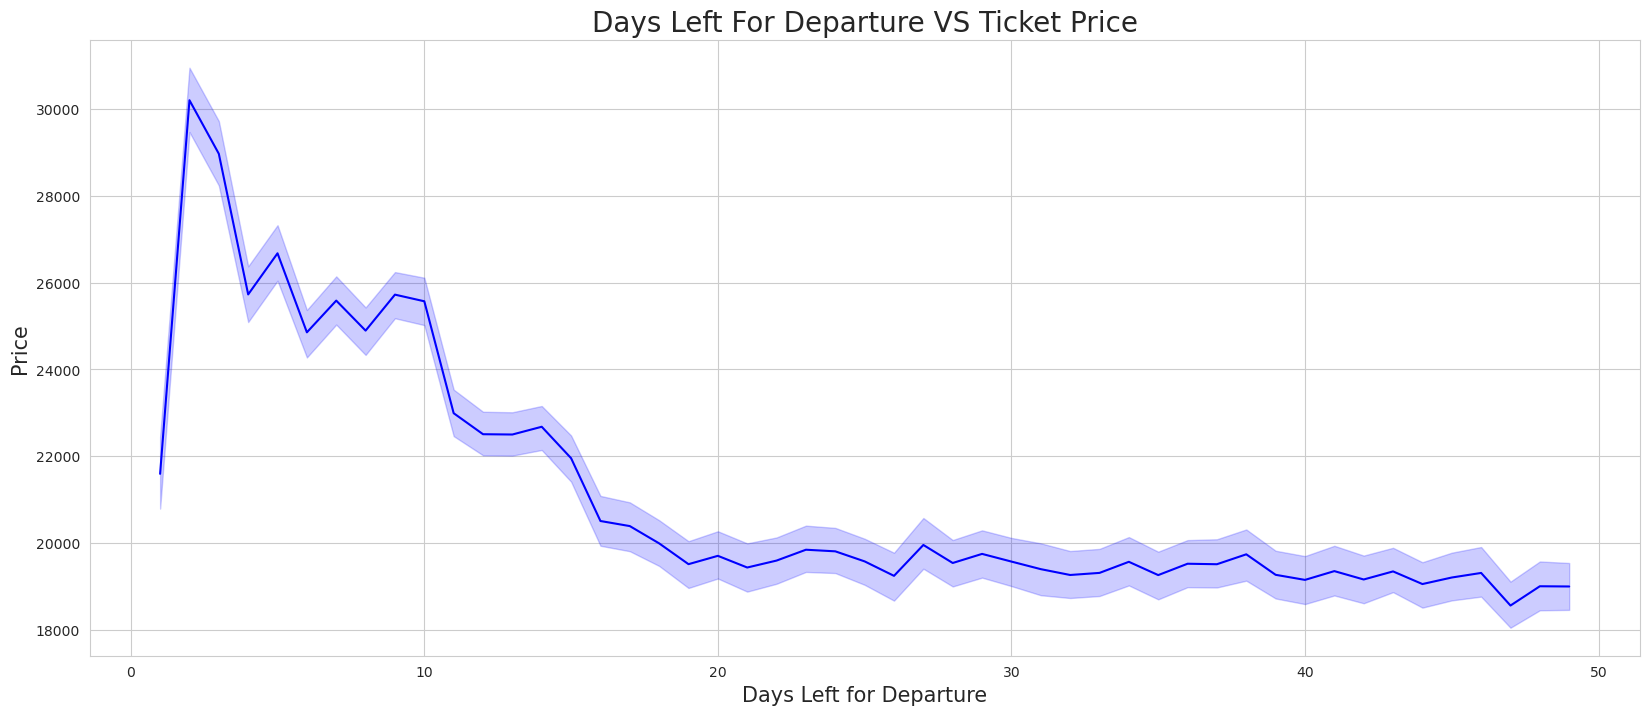

In [19]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure VS Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()


**Estimated Price of Ticket of Each Airline Company before the Departure Time**


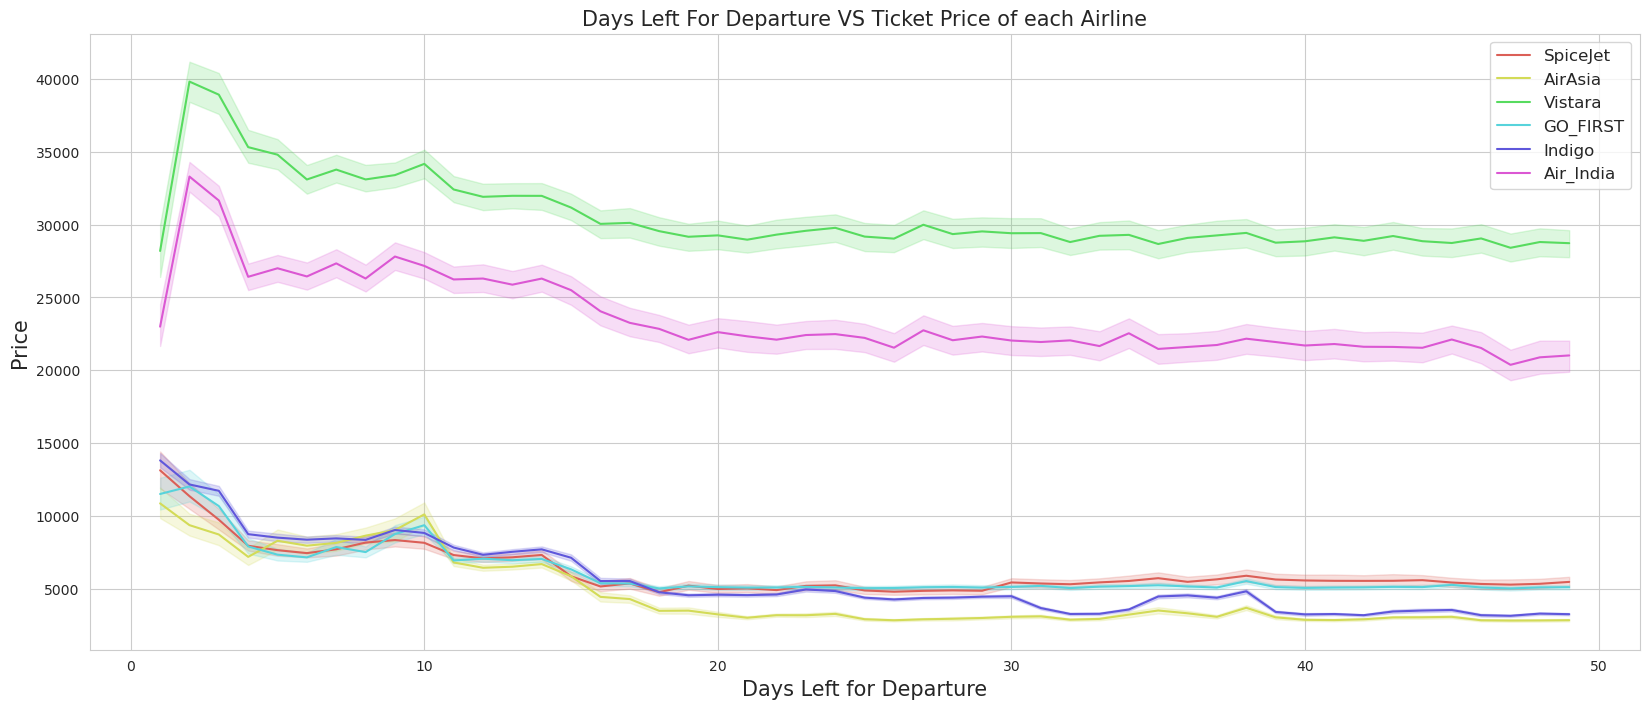

In [20]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue',hue='airline',palette='hls')
plt.title('Days Left For Departure VS Ticket Price of each Airline',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

# **Identifying the categorical features:**

In [21]:
# capturing those of type *object*

cat_cols = list(df.select_dtypes(include=['object']).columns)
print(f"Number of categorical columns: {len(cat_cols)}")
print(f"Categorical columns:\n{cat_cols}")

Number of categorical columns: 8
Categorical columns:
['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']


# **Performing target encoding for all categorical variables:**

* Target encoding, also known as probability encoding, is a technique for encoding categorical characteristics in which the mean (or median) of the target variable for each category is used in place of the category's name. In other words, we encode the categories of a categorical feature in the target variable.

* For instance, the goal variable "price" and the category feature "airline" both exist in our dataset. To update the values for the "airline" feature, we may compute the average cost for each airline and use those results. In this manner, the target variable "price"' data is being encoded into the "airline" feature.

* Target encoding has the benefit of being able to more accurately represent the link between the category feature and the target variable than one-hot encoding, particularly when the categorical feature contains a lot of categories. Target encoding can also make the feature space less dimensional.

* A significant variation in the target encoding values might result from target encoding overfitting if there are insufficient samples for some categories.

In [22]:
import category_encoders as ce

te = ce.TargetEncoder(cols=cat_cols)
df = te.fit_transform(df, df['price'])

In [23]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,6179.278881,4740.222372,18951.326639,21232.361894,9375.938535,21586.758341,21372.529469,6572.342383,2.17,1,5953
1,1,6179.278881,5072.414608,18951.326639,20370.676718,9375.938535,22231.076098,21372.529469,6572.342383,2.33,1,5953
2,2,4091.072742,3909.345184,18951.326639,20370.676718,9375.938535,14993.139521,21372.529469,6572.342383,2.17,1,5956
3,3,30396.536302,31270.540039,18951.326639,21630.760254,9375.938535,18494.598993,21372.529469,6572.342383,2.25,1,5955
4,4,30396.536302,33805.822695,18951.326639,21630.760254,9375.938535,22231.076098,21372.529469,6572.342383,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,30396.536302,27586.745543,21995.339871,21630.760254,22900.992482,23044.371615,20427.661284,52540.081124,10.08,49,69265
300149,300149,30396.536302,26276.531478,21995.339871,18179.203331,22900.992482,21586.758341,20427.661284,52540.081124,10.42,49,77105
300150,300150,30396.536302,31499.719218,21995.339871,20370.676718,22900.992482,21586.758341,20427.661284,52540.081124,13.83,49,79099
300151,300151,30396.536302,28283.469262,21995.339871,20370.676718,22900.992482,23044.371615,20427.661284,52540.081124,10.00,49,81585


**Identifying numerical columns:**

In [24]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(numeric_cols)


['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price']


**Checking for missing values:**

In [25]:
features_with_na = [col for col in df.columns if df[col].isna().sum() > 0]

missing_values_df = pd.DataFrame(df[features_with_na].isnull().mean().sort_values(ascending=False), columns=["percentage"])
missing_values_df.head(10)

,percentage


This dataset has no missing values.

# **Scaling Data:**

* In machine learning, scaling is a preprocessing procedure that seeks to standardise the range or scale of the input information. Scaling aims to guarantee that each feature has a comparable size or range, which might assist some machine learning models in converging more quickly and performing better.

* MinMaxScaler is a popular scaling technique that scales the data to a predetermined range of values between 0 and 1. It operates by dividing by the range, or the difference between the maximum and minimum values, after subtracting the minimum value for each feature.

* The advantage of MinMaxScaler is that it preserves the shape of the original distribution and does not change the relative position of the data points. It is also relatively simple to use and understand.

In [26]:
# Min Max Scaler: transformation of data

names = df.columns
indexes = df.index
sc = MinMaxScaler((0, 1)) #between 0 and 1 range
df = sc.fit_transform(df)
data_scaled = pd.DataFrame(df, columns=names, index=indexes)
data_scaled.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0.000000,0.079383,0.058197,0.0,0.867088,0.0,0.876048,0.833363,0.0,0.027347,0.0,0.039749
1,0.000003,0.079383,0.066940,0.0,0.804496,0.0,0.930839,0.833363,0.0,0.030612,0.0,0.039749
2,0.000007,0.000000,0.036328,0.0,0.804496,0.0,0.315340,0.833363,0.0,0.027347,0.0,0.039773
3,0.000010,1.000000,0.756488,0.0,0.896027,0.0,0.613097,0.833363,0.0,0.028980,0.0,0.039765
4,0.000013,1.000000,0.823218,0.0,0.896027,0.0,0.930839,0.833363,0.0,0.030612,0.0,0.039765


**Setting our target variables:**

In [27]:
# Set 'price' as the target variable
y = data_scaled['price']

# Extract the input features
X_data = data_scaled.drop(['price'], axis=1)

# **Evaluating Our Model Using Machine Learning (ML) Models**


**1. Score:**

* The score method provides a convenient way to quickly evaluate the performance of a trained model on a test dataset, without having to manually compute the evaluation metric.

* However, it is important to keep in mind that the choice of evaluation metric can have a significant impact on the performance of the model and the conclusions that can be drawn from the results. Therefore, it is often a good idea to use multiple evaluation metrics and perform cross-validation to ensure that the model is robust and generalizes well to new data.

* For classification problems, model.score might return the accuracy, precision, recall, or F1 score, depending on the specific classification algorithm and the choice of evaluation metric. For regression problems, model.score might return the R-squared value, the mean absolute error, or the mean squared error, among others.

**2. Mean squared error (MSE) :**

* The MSE metric measures the average squared deviation of the predicted values from the actual values. It is a non-negative value where a value of zero indicates a perfect match between the predicted and actual values. A larger MSE value indicates a higher degree of error between the predicted and actual values. The MSE metric is sensitive to outliers, meaning that a few large errors can significantly increase the overall MSE value.

* MSE is commonly used to evaluate the performance of regression models and can be used to compare the performance of different regression algorithms or to tune hyperparameters of a regression model.

**3. R-squared:**

* A statistical indicator that indicates how well the regression model fits the data is called R-squared (R2). It gauges how much of the variance in the dependent variable, which you are attempting to forecast, can be accounted for by the independent variables, which you are relying on to do so.

* An improved model-data fit is indicated by a higher R-squared value, which goes from 0 to 1. A score of 1 indicates that the model fully accounts for the dependent variable's variance, while a score of 0 indicates that the model does not account for any variation.

* R-squared is helpful because it offers a quick method to assess how well various regression models perform. The accuracy of specific predictions is not disclosed; instead, it simply provides information on how well the model matches the data as a whole. As a result, it is frequently used in conjunction with other assessment measures, including mean squared error, to gain a deeper understanding of the model's performance.




**Split the data into training and testing sets:**

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=42)

# **Linear Regression:**

* Linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables. The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression.

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


reg = LinearRegression().fit(X_train, y_train)


y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)


accuracy_train = reg.score(X_train, y_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)


accuracy_test = reg.score(X_test, y_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)


print("Accuracy - Train: {:} Test: {:}".format(accuracy_train, accuracy_test))
print("MSE - Train: {:} Test: {:}".format(mse_train, mse_test))
print("R2 - Train: {:} Test: {:}".format(r2_train, r2_test))

Accuracy - Train: 0.9059365375848946 Test: 0.9059881647111783
MSE - Train: 0.00325721165415303 Test: 0.0032577571341226587
R2 - Train: 0.9059365375848946 Test: 0.9059881647111783


> **Linear Regression --> 90.2% accuracy**

# **Decision Tree:**

* In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.

* The decisions or the test are performed on the basis of features of the given dataset.

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

dt = DecisionTreeRegressor(random_state=42)

dt.fit(X_train, y_train)

# Predict the values for the training and testing sets
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

# Compute the accuracy, MSE, and R2 for the training set
accuracy_train = dt.score(X_train, y_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Compute the accuracy, MSE, and R2 for the testing set
accuracy_test = dt.score(X_test, y_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Accuracy - Train: {:} Test: {:}".format(accuracy_train, accuracy_test))
print("MSE - Train: {:} Test: {:}".format(mse_train, mse_test))
print("R2 - Train: {:} Test: {:}".format(r2_train, r2_test))

Accuracy - Train: 1.0 Test: 0.9863419834415091
MSE - Train: 3.1438247561116846e-32 Test: 0.0004732861638611111
R2 - Train: 1.0 Test: 0.9863419834415091


> **Decision Tree --> 97.6% accuracy**

# **Random Forest:**

* Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(n_estimators=10, random_state=42)

rf.fit(X_train, y_train)

# Predict the values for the training and testing sets
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Compute the accuracy, MSE, and R2 for the training set
accuracy_train = rf.score(X_train, y_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Compute the accuracy, MSE, and R2 for the testing set
accuracy_test = rf.score(X_test, y_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Accuracy - Train: {:} Test: {:}".format(accuracy_train, accuracy_test))
print("MSE - Train: {:} Test: {:}".format(mse_train, mse_test))
print("R2 - Train: {:} Test: {:}".format(r2_train, r2_test))

Accuracy - Train: 0.9983388216176187 Test: 0.9904946632621193
MSE - Train: 5.752296851291136e-05 Test: 0.000329384895794613
R2 - Train: 0.9983388216176187 Test: 0.9904946632621193


> **Random Forest --> 98.4% accuracy**

# **Conclusion**

* Effective data analysis is a result of the interaction between EDA and ML models. Insights into the data are provided by EDA, which also directs the selection and preparation of features. Machine learning models then use these insights to forecast the future and extrapolate valuable data.

* To guarantee accurate and trustworthy outcomes, EDA and ML models both need close attention to detail, iterative exploration, and ongoing validation.